In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

### 2.3.2 k近邻
kNN算法可以说是最简单的机器学习算法。构建模型只需要保存训练数据集即可。想要对新数据点做出预测，算法会在训练数据集中找到最近的数据点，也就是它的“最近邻”。

#### 2.3.2.1 k近邻分类
kNN算法最简单的版本只考虑一个最近邻，也就是与我们想要预测的数据点最近的训练数据点。预测结果就是这个训练数据点的已知输出。下图给出了这种分类方法在forge数据集上的应用：

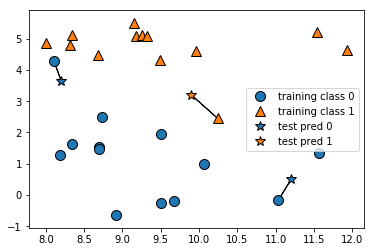

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

还可以考虑任意个(k个)邻居。这也是kNN名字的来历。在考虑多于一个邻居的情况时，我们用“投票法”（voting）来指定标签。也就是说，对于每个测试点，我们数一数多少个邻居属于类别0，多少个邻居属于类别1，然后将出现次数更多的类别作为预测结果。下图用到了3个近邻：

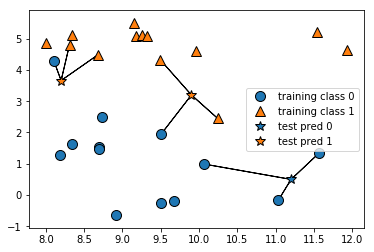

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

通过scikit-learn来应用kNN算法：

In [4]:
# 构造二分类数据集forge
X, y = mglearn.datasets.make_forge()
# 将数据分为测试集和训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 构造kNN分类器对象，近邻数选择3
clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
# 利用训练数据构建模型
clf.fit(X_train, y_train)
# 测试模型
clf.predict(X_test)
# 模型的精度
clf.score(X_test, y_test)

0.8571428571428571

#### 2.3.2.2 分析 KNeighborsClassifier
对于二维数据集，我们还可以在$xy$平面上画出所有可能的测试点的预测结果。我们根据平面中每个点所属的类别对平面进行着色。这样可以查看决策边界(decision boundary)，即算法对类别0和类别1的分界线。

下列代码分别将近邻数设置为1、3、9三种情况的决策边界可视化：

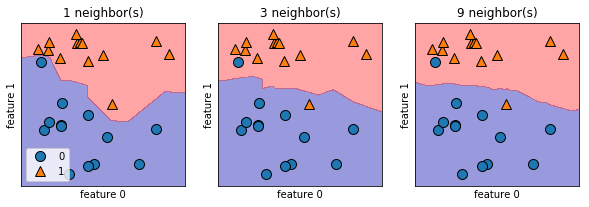

In [5]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

plt.show()

从左图可以看出，使用单一邻居绘制的决策边界紧跟着训练数据。随着邻居个数越来越多，决策边界也越来越平滑。更平滑的边界对应更简单的模型。换句话说，使用更少的邻居对应更高的模型复杂度，而使用更多的邻居对应更低的模型复杂度。假如考虑极端情况，即邻居个数等于训练集中所有数据点的个数，那么每个测试点的邻居都完全相同（即所有训练点），所有预测结果也完全相同（即训练集中出现次数最多的类别）。

我们使用现实世界的乳腺癌数据集上进行测试：

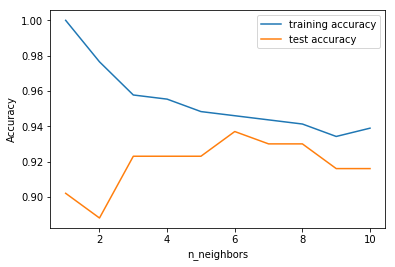

In [6]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# n_neighbors取值从1到10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 构建模型
    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 记录训练集精度
    training_accuracy.append(clf.score(X_train, y_train))
    # 记录泛化精度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

图像的$x$轴是n_neighbors，$y$轴是训练集精度和测试集精度，我们可以看出过拟合与欠拟合的一些特征。仅考虑单一近邻时，训练集上的预测结果十分完美。但随着邻居个数的增多，模型变得更简单，训练集精度也随之下降。单一邻居时的测试集精度比使用更多邻居时要低，这表示单一近邻的模型过于复杂。与之相反，当考虑10个邻居时，模型又过于简单，性能甚至变得更差。最佳性能在中间的某处，邻居个数大约为6。不过最好记住这张图的坐标轴刻度。最差的性能约为88%的精度，这个结果仍然可以接受。

#### 2.3.2.3 kNN回归
kNN算法可以用于回归。我们还是先从单一近邻开始，这次使用wave数据集。我们添加了3个测试数据点，在$x$轴上用绿色五角星表示。利用单一邻居的预测结果就是最近邻的目标值：

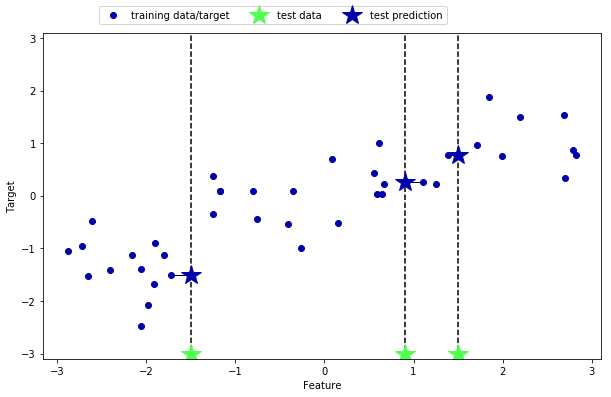

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

也可以用多个近邻进行回归，预测结果为这些邻居的平均值：

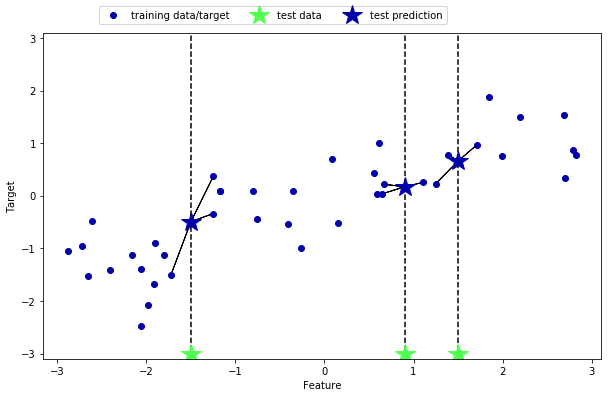

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

用于回归的kNN算法在KNeighborsRegressor类中实现：

In [9]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# 将wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 模型实例化，并将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)
# 利用训练数据和训练目标值来拟合模型
reg.fit(X_train, y_train)
# 测试结果
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


对于回归问题，这一方法返回的是$R^2$分数。$R^2$分数也叫作决定系数，是回归模型预测的优度度量，位于0到1之间。$R^2$等于1对应完美预测，等于0对应常数模型，即总是预测训练集响应(y_train)的平均值

#### 2.3.2.4 分析KNeighborsRegressor
对于我们的一维数据集，可以查看所有特征取值对应的预测结果：

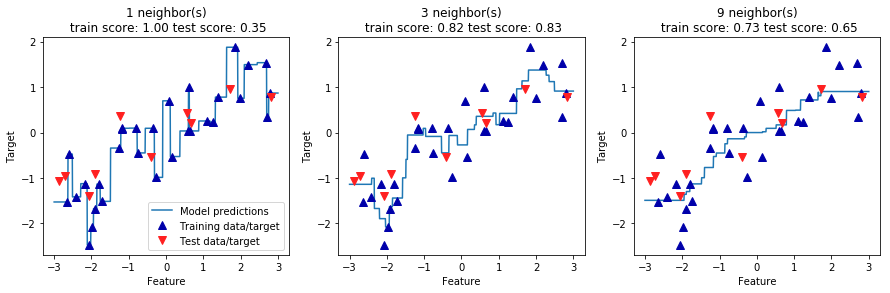

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# 创建1000个数据点，在-3和3之间均匀分布
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 利用1个、3个或9个邻居分别进行预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target",
                    "Test data/target"], loc="best")
plt.show()

从图中可以看出，仅使用单一邻居，训练集中的每个点都对预测结果有显著影响，预测结果的图像经过所有数据点。这导致预测结果非常不稳定。考虑更多的邻居之后，预测结果变得更加平滑，但对训练数据的拟合也不好。

#### 2.3.2.5 优缺点和参数
一般来说，kNN分类器有2个重要参数：邻居个数与数据点之间距离的度量方法。在实践中，使用较小的邻居个数(比如3或5个)往往可以得到比较好的结果，但你应该调节这个参数。选择合适的距离度量方法超出了本书的范围。默认使用欧式距离，它在许多情况下的效果都很好。

kNN的优点之一就是模型很容易理解，通常不需要过多调节就可以得到不错的性能。在考虑使用更高级的技术之前，尝试此算法是一种很好的基准方法。

构建kNN模型的速度通常很快，但如果训练集很大(特征数很多或者样本数很大)，预测速度可能会比较慢。

**使用kNN算法时，对数据进行预处理是很重要的(见第3章)。 这一算法对于有很多特征(几百或更多)的数据集往往效果不好，对于大多数特征的大多数取值都为0的数据集(所谓的`稀疏数据集`)来说，这一算法的效果尤其不好。**

虽然kNN算法很容易理解，但由于预测速度慢且不能处理具有很多特征的数据集，所以在实践中往往不会用到。下面介绍的线性模型就没有这两个缺点。